In [1]:
# -*- coding: utf-8 -*-
# Author: Kay Zhou
# Date: 2019-02-24 15:44:05

import os
from pathlib import Path
import ujson as json
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from my_weapon import *

In [2]:
import unicodedata

def normalize(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode()

def normalize_lower(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode().lower()

In [6]:
def get_hts():
    K_ht = set()
    M_ht = set()
    A_ht = set()
    focus_ht = set()

    for line in open("data/hashtags/2019-05-24.txt"):
        w = line.strip().split()
        ht = w[1]
        focus_ht.add(ht)
        if w[0] == "K":
            K_ht.add(ht)
        elif w[0] == "M":
            M_ht.add(ht)
        elif w[0] == "A":
            A_ht.add(ht)
    focus_ht = K_ht | M_ht | A_ht
    print(len(K_ht), len(M_ht), len(A_ht), len(focus_ht))
    return K_ht, M_ht, A_ht, focus_ht

K_ht, M_ht, A_ht, focus_ht = get_hts()

81 29 9 119


In [7]:
#**** !!!

from SQLite_handler import get_all_tweets_with_hashtags, get_session
from collections import Counter

Ntweets = 0
only_focus_count = Counter()
hts_count = Counter()

sess = get_session()
tweets = get_all_tweets_with_hashtags(sess)
for t in tqdm(tweets):
    _hts = [_ht for _ht in t[1].split(",") if _ht in focus_ht]
    if len(_hts) == 0:
        continue
        
#     Ntweets += 1
#     if len(_hts) == 1:
#         hts_count[_hts[0]] += 1
    elif len(_hts) >= 2:
        Ntweets += 1
        for i in range(len(_hts)):
            hts_count[_hts[i]] += 1
            for j in range(i+1, len(_hts)):
                n1, n2 = _hts[i], _hts[j]
                if n1 > n2:
                    n1, n2 = n2, n1
                only_focus_count[(n1, n2)] += 1
                
G = nx.Graph()


for e in only_focus_count:
    w = only_focus_count[e]
    G.add_edge(*e, weight=w)

    
for n in G.node():
    G.node[n]["num"] = hts_count[n]
G.graph["Ntweets"] = Ntweets

G.number_of_nodes(), G.number_of_edges()
nx.write_gpickle(G, "data/hts_20190524.gpickle")

In [9]:
tag = "cristina2019"
rst = sorted({n: G[tag][n]["weight"] for n in G[tag]}.items(),
             key=lambda k: k[1], reverse=True)
for i, r in enumerate(rst):
    print(r)

('nestorcumple', 1136)
('fuerzacristina', 914)
('chaumacri', 782)
('ellalegana', 717)
('hayotrocamino', 625)
('sinceramente', 616)
('nestorvive', 531)
('abismopro', 487)
('cfk', 467)
('cfkenlaferia', 450)
('cambiemos', 374)
('massa2019', 331)
('pongamosunafotodecfk', 302)
('macri', 289)
('cristina', 242)
('ellavuelve', 241)
('cristinateesperamos', 207)
('navarro2019', 178)
('habraconsecuencias', 174)
('concfkviviasmejor', 124)
('stornelliaindagatoria', 121)
('juiciopoliticoamacri', 121)
('macri2019', 114)
('21mporlaverdad', 113)
('todomal', 110)
('macriescaos', 96)
('ruidazo', 80)
('1mruidazonacional', 77)
('vidalespeorquemacri', 74)
('lamafiademacri', 70)
('andatemacri', 66)
('nestorpudo', 51)
('evita100anos', 50)
('cronicaanunciada', 47)
('chaucambiemos', 47)
('macrichau', 37)
('dalessiogate', 29)
('macrisis', 28)
('cristinasomostodos', 28)
('mananasylvestre10anos', 25)
('elplandecristina', 21)
('hambrepro', 21)
('sevamacri', 20)
('confirmenaramospadilla', 17)
('massa', 16)
('colapso

In [12]:
G = nx.Graph()

for e in focus_count:
    w = focus_count[e]
    G.add_edge(*e, weight=w)

In [14]:
nx.write_pajek(G, "data/focus_20190305.pajek")

In [15]:
G = nx.Graph()

for e in entire_count:
    w = entire_count[e]
    G.add_edge(*e, weight=w)
    
for n in G.nodes():
    G.node[n]["num"] = hashtag_count[n]
    
G.graph["Ntweets"] = Ntweets

In [37]:
G.number_of_nodes(), G.number_of_edges()

(134, 331)

In [50]:
G = nx.read_gpickle("data/hts_20190808_sig.gpickle")
G.number_of_nodes(), G.number_of_edges()

(154, 3722)

In [24]:
G = nx.read_gpickle("data/entire_20190327_before.gpickle")
G.number_of_nodes(), G.number_of_edges()

In [51]:
should_be_removed = []

for e in G.edges(data=True):
    # print(e[2]["sign"])
    if e[2]["sign"] < 0:
        should_be_removed.append((e[0], e[1]))
        
for e in should_be_removed:
    G.remove_edge(e[0], e[1])

In [52]:
largest_components = max(nx.connected_components(G), key=len)

In [53]:
G = G.subgraph(largest_components)

In [54]:
G.number_of_nodes(), G.number_of_edges()

(134, 331)

In [23]:
def cal_G(G)
    N = 0

    for n in G.node():
        G.node[n]["num"] = 0

    for e in G.edges(data=True):
        n1 = e[0]
        n2 = e[1]
        w = e[2]["weight"]
        G.node[n1]["num"] += w
        G.node[n2]["num"] += w
        N += w

    G.graph["Ntweets"] = N
    
cal_G(G)

1508736

In [24]:
ht_camp = {line.strip().split()[1]: line.strip().split()[0] for line in open("data/hashtags/2019-08-09.txt")}

In [34]:
for (n1, n2, d) in G.edges(data=True):
    d.clear()

In [35]:
for n in G.node:
    G.node[n]["camp"] = ht_camp[n]
#     print(n, G.node[n])

In [36]:
nx.write_gexf(G, "data/hts-0808.gexf")

In [25]:
nx.write_gpickle(G, "data/entire_20190307.gpickle")

## Extracting the text of training dataset with hashtags

In [ ]:
with open("disk/data/20190327-predicted-text.txt", "w") as f:
    tweets_id = set()
    for in_name in tqdm(os.listdir("disk")):
        if in_name.endswith(".txt"):
            if in_name.endswith("PRO.txt") or in_name.endswith("Moreno.txt") or in_name.endswith("Sola.txt"):
                continue
            in_name = os.path.join("disk", in_name)
            print(in_name)
            for line in open(in_name):
                d = json.loads(line.strip())
                if d["id"] in tweets_id:
                    continue
                tweets_id.add(d["id"])
                text = normalize(d["text"].replace("\n", " "))
                f.write("{}\t{}\n".format(d["user"]["id"], text))

In [96]:
with open("disk/data/20190327-predicted-text.txt", "w") as f:
    tweets_id = set()
    for in_name in tqdm(os.listdir("disk")):
        if in_name.endswith(".txt"):
            if in_name.endswith("PRO.txt") or in_name.endswith("Moreno.txt") or in_name.endswith("Sola.txt"):
                continue
            in_name = os.path.join("disk", in_name)
            print(in_name)
            for line in open(in_name):
                d = json.loads(line.strip())
                if d["id"] in tweets_id:
                    continue
                tweets_id.add(d["id"])
                text = normalize(d["text"].replace("\n", " "))
                f.write("{}\t{}\n".format(d["user"]["id"], text))

disk/201902-Alternativa AND Federal.txt
disk/201902-Peronista.txt
disk/201903-Partido AND Justicialista.txt
disk/201902-PJ.txt
disk/201902-Scioli.txt
disk/201903-PJ.txt
disk/201903-Urtubey.txt
disk/201903-Massa.txt
disk/201902-Partido AND Justicialista.txt
disk/201903-UCR.txt
disk/201902-Cristina.txt
disk/201902-Alfonsin.txt
disk/201902-Propuesta AND Republicana.txt
disk/201902-mauriciomacri OR PASO OR macrismo OR kirchnerismo OR peronismo.txt
disk/201903-mauriciomacri OR PASO OR macrismo OR kirchnerismo OR peronismo.txt
disk/201903-Alternativa AND Federal.txt
disk/201902-Bregman.txt
disk/201902-Pichetto.txt
disk/201903-Alfonsin.txt
disk/201902-UCR.txt
disk/201902-Cambiemos.txt
disk/201903-Donda.txt
disk/201903-Cristina.txt
disk/201902-Frente AND Izquierda.txt
disk/201902-Lousteau.txt
disk/201902-Lavagna.txt
disk/201902-Macri.txt
disk/201902-Capitanich.txt
disk/201902-Cristina OR Kirchner OR Macri OR elecciones OR CFK OR CFKArgentina.txt
disk/201902-Urtubey.txt
disk/201903-Pichetto.txt

In [46]:
cnt = pd.read_csv("disk/data/cnt_supporters.csv").set_index("Unnamed: 0")

In [47]:
cnt = cnt.rename({"SVMLINER": "LINEAR SVM"})
cnt = cnt.rename(columns={"0": "Cristina", "1": "Macri", "2": "Unclassified"})
cnt = cnt.transpose()

In [48]:
for c in cnt.columns:
    print(c)
    cnt[c + " %"] = cnt[c] / sum(cnt[c])

cnt = cnt[["LR", "LR %", "LINEAR SVM", "LINEAR SVM %", "NB", "NB %", "RF", "RF %", "DT", "DT %"]]
cnt.to_excel("cnt.xlsx")
cnt

LR
LINEAR SVM
NB
RF
DT


Unnamed: 0,LR,LR %,LINEAR SVM,LINEAR SVM %,NB,NB %,RF,RF %,DT,DT %
Cristina,1960405,0.622961,1987872,0.631690,1655432,0.526049,2608552,0.828924,2147739,0.682491
Macri,890638,0.283020,852843,0.271009,1152559,0.366251,357211,0.113512,702716,0.223303
Unclassified,295870,0.094019,306198,0.097301,338922,0.107700,181150,0.057564,296458,0.094206


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)


plt.figure(figsize=(13, 6))
cnt["0"].plot.bar(width=0.1, position=1, color=sns.color_palette("muted")[0], label="Supporting Cristina")
cnt["1"].plot.bar(width=0.1, position=0, color=sns.color_palette("muted")[1], label="Supporting Macri")
cnt["2"].plot.bar(width=0.1, position=-1, color=sns.color_palette("muted")[2], label="Unclassified")

plt.xlabel(None)
plt.ylabel("Number of Twitter users")
plt.xlim(-0.5, 6)
plt.legend()

plt.tight_layout()
plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()
plt.show()
plt.close()

In [136]:
# for i, row in cnt.iterrows():
#     cnt["0"][i])

cnt.iloc[0] = cnt.iloc[0] / sum(cnt.iloc[0]) * 100
cnt.iloc[1] = cnt.iloc[1] / sum(cnt.iloc[1]) * 100
cnt.iloc[2] = cnt.iloc[2] / sum(cnt.iloc[2]) * 100
cnt.iloc[3] = cnt.iloc[3] / sum(cnt.iloc[3]) * 100
cnt.iloc[4] = cnt.iloc[4] / sum(cnt.iloc[4]) * 100

# = df['Prices'] / df['Prices'].sum()

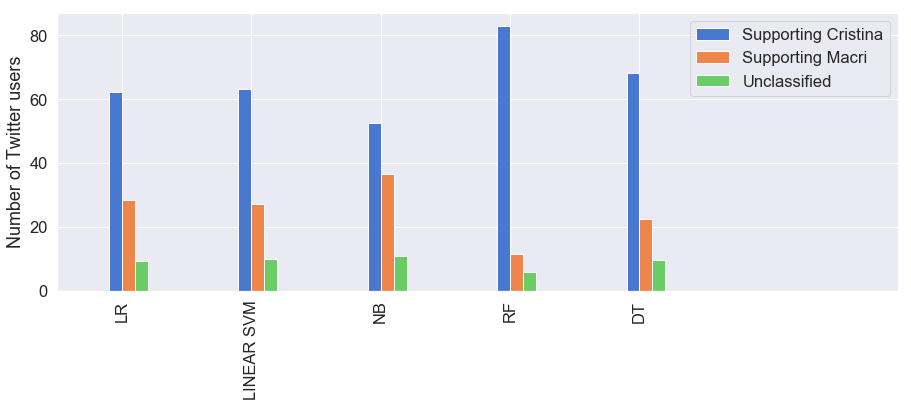

In [137]:
plt.figure(figsize=(13, 6))
cnt["0"].plot.bar(width=0.1, position=1, color=sns.color_palette("muted")[0], label="Supporting Cristina")
cnt["1"].plot.bar(width=0.1, position=0, color=sns.color_palette("muted")[1], label="Supporting Macri")
cnt["2"].plot.bar(width=0.1, position=-1, color=sns.color_palette("muted")[2], label="Unclassified")

plt.xlabel(None)
plt.ylabel("Number of Twitter users")
plt.xlim(-0.5, 6)
plt.legend()

plt.tight_layout()
plt.savefig("fig/support_percentage.pdf", dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()
plt.show()
plt.close()

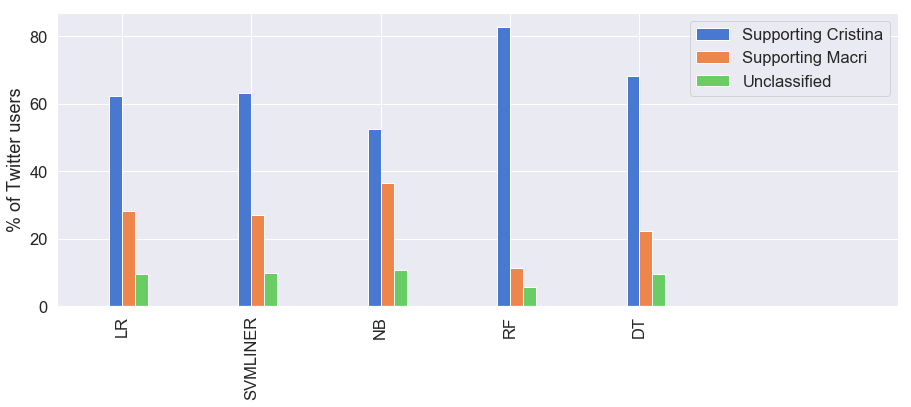

In [127]:
plt.figure(figsize=(13, 6))
cnt["0"].plot.bar(width=0.1, position=1, color=sns.color_palette("muted")[0], label="Supporting Cristina")
cnt["1"].plot.bar(width=0.1, position=0, color=sns.color_palette("muted")[1], label="Supporting Macri")
cnt["2"].plot.bar(width=0.1, position=-1, color=sns.color_palette("muted")[2], label="Unclassified")

plt.xlabel(None)
plt.ylabel("% of Twitter users")
plt.xlim(-0.5, 6)
plt.legend()

plt.tight_layout()
plt.savefig("fig/support_rate_persent.pdf", dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()
plt.show()
plt.close()

## Label propagation

In [14]:
G = nx.read_gpickle("data/hts_20190611_sig.gpickle")

t1 = []
should_remove = []
p_value = []

threshold = 7

for e in G.edges(data=True):
    n1 = int(G.node[e[0]]["num"])
    n2 = int(G.node[e[1]]["num"])
    w  = int(e[2]["weight"])
    _t1 = max([w / n1, w / n2])
    
    # G.edges[e[0], e[1]]["weight"] = float(_t1)
#     G.edges[e[0], e[1]]["weight"] = float(G.edges[e[0], e[1]]["sign"])
    sig = int(G.edges[e[0], e[1]]["sign"])
    
    if sig < 0:
        sig = 0
#     elif sig > 1000:
#         sig = 1000
    G.edges[e[0], e[1]]["sign"] = sig
    G.edges[e[0], e[1]]["weight"] = 1
    
    if sig > 0:
        # print(sig)
        p_value.append(sig)
    
    if sig < threshold:
        should_remove.append([e[0], e[1]])
    
    
#     if _t1 > 0.05:
#         G.edges[e[0], e[1]]["p"] = t1
#     else:
#         t1.append(_t1)
#         should_remove.append([e[0], e[1]])

print(f"We have removed {len(should_remove)} links with p-value > 10^-{threshold}!!")
for e in should_remove:
    G.remove_edge(e[0], e[1])
    
print(f"Now {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


# print(len(t1))
# pd.Series(t1).hist(bins=100)

We have removed 2152 links with p-value > 10^-7!!
Now 118 nodes and 206 edges


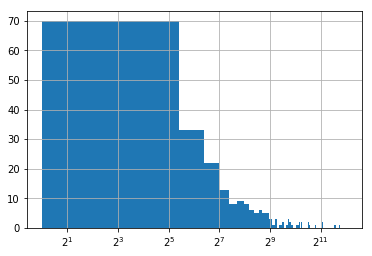

In [15]:
pd.Series(p_value).hist(bins=100)
plt.xscale('log', basex=2)

In [16]:
for n in G.nodes():
    if n in K_ht:
        G.node[n]["camp"] = "K"
    if n in M_ht:
        G.node[n]["camp"] = "M"
    if n in A_ht:
        G.node[n]["camp"] = "A"

count     206.000000
mean      380.592233
std       676.850763
min         7.000000
25%        45.250000
50%       120.500000
75%       377.250000
max      4146.000000
dtype: float64

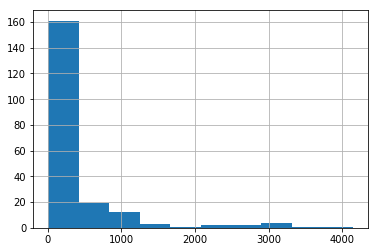

In [19]:
d = pd.Series([e[2]["sign"] for e in G.edges(data=True)])
d.hist(bins=10)
d.describe()

In [20]:
nx.write_gexf(G, "data/marked-20190611.gexf")

In [62]:
G = nx.read_gpickle("data/hts_20190524_sig.gpickle")

# 该网络已经通过了cal the edge significance
G.number_of_nodes(), G.number_of_edges()

(118, 2256)

In [53]:
len(K_ht), len(M_ht), len(A_ht)

(81, 29, 9)

In [54]:
import numpy as np

def largest_component(G):
    largest_components = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_components)

def ask_for_significance(G):
    for e in G.edges(data=True):
        if G.edges[(e[0], e[1])]["sign"] > -1:
            G.edges[(e[0], e[1])]["sign"] = np.log10(1e-24 / G.edges[(e[0], e[1])]["sign"])
    return G

def remove_nonsignificance(G):
    should_be_removed = []
    for e in G.edges(data=True):
        if e[2]["sign"] < 0:
            should_be_removed.append((e[0], e[1]))

    G = nx.Graph(G)
    for e in should_be_removed:
        G.remove_edge(e[0], e[1])
    return G

In [55]:
G = ask_for_significance(G)
G = remove_nonsignificance(G)
# G = largest_component(G)
G.number_of_nodes(), G.number_of_edges()

(118, 249)

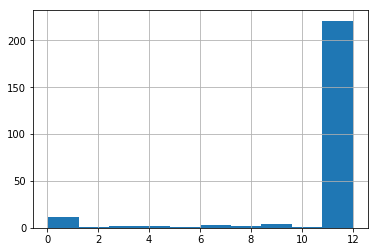

In [56]:
signs = []

import matplotlib.pyplot as plt
for e in G.edges(data=True):
#     print(e)
    signs.append(e[2]['sign'])

pd.Series(signs).hist()
plt.show()

In [57]:
Nodes = {}

for e in tqdm(G.edges(data=True)):
    if e[0] not in Nodes:
        Nodes[e[0]] = dict(M=0, K=0, A=0)
    if e[1] not in Nodes:
        Nodes[e[1]] = dict(M=0, K=0, A=0)
    
    if e[0] in focus_ht and e[1] in focus_ht:
        continue
    elif e[0] in K_ht:
        Nodes[e[1]]["K"] += e[2]['sign']
    elif e[1] in K_ht:
        Nodes[e[0]]["K"] += e[2]['sign']
        
    elif e[0] in M_ht:
        Nodes[e[1]]["M"] += e[2]['sign']
    elif e[1] in M_ht:
        Nodes[e[0]]["M"] += e[2]['sign']
        
    elif e[0] in A_ht:
        Nodes[e[1]]["A"] += e[2]['sign']
    elif e[1] in A_ht:
        Nodes[e[0]]["A"] += e[2]['sign']
 
for ht in K_ht:
    Nodes[ht]["K"] = 1000
        
for ht in M_ht:
    try:
        Nodes[ht]["M"] = 1000
    except:
        print(ht)
    
for ht in A_ht:
    try:
        Nodes[ht]["A"] = 1000
    except:
        print(ht)


mananacordobacambia
peponilaconmacri
lilitaconmajul
ponelelavagnaalprograma


对节点进行数量上的限定

In [25]:
max_oc_M = max([G.node[name]["num"] for name, score in Nodes.items() if max(score, key=lambda x:score[x]) == "M"])
max_oc_K = max([G.node[name]["num"] for name, score in Nodes.items() if max(score, key=lambda x:score[x]) == "K"])
max_oc_A = max([G.node[name]["num"] for name, score in Nodes.items() if max(score, key=lambda x:score[x]) == "A"])
max_oc = max(max_oc_M, max_oc_K, max_oc_A)
# max_oc = max(max_oc_M, max_oc_K)
print(max_oc_M, max_oc_K)

15386 16590


In [26]:
maybe_M_hashtags = {name: score["M"] for name, score in Nodes.items() \
                        if score["M"] > 3
                            and score["M"] / sum(score.values()) > 0.5
                            and G.node[name]['num'] > (max_oc_M * 0.05)}

for name in sorted(maybe_M_hashtags.items(), key=lambda d: d[1], reverse=True):
    print(name)
#     print(name[0])

('macri', 1000)
('novuelvenmas', 1000)
('macri2019', 1000)
('vidal', 1000)
('ucr', 1000)
('cambiemos', 1000)
('mm2019', 1000)
('defensoresdelcambio', 1000)
('macritevuelvoaelegir', 1000)
('yosigoconfiando', 1000)
('gutierrezesmacri', 1000)
('debodecir', 1000)
('macriconmajul', 1000)
('macriestoyconvos', 1000)
('sefugarontodo', 1000)
('elplandecristina', 1000)
('fuerzapresidente', 1000)
('fuerzamauricio', 1000)


In [27]:
maybe_K_hashtags = {name: score["K"] for name, score in Nodes.items() \
                        if score["K"] > 3
                            and score["K"] / sum(score.values()) > 0.5
                            and G.node[name]['num'] > (max_oc_M * 0.05)}

for name in sorted(maybe_K_hashtags.items(), key=lambda d: d[1], reverse=True):
    print(name)
#     print(name[0])

('cfk', 1000)
('kirchnerismo', 1000)
('macrinuncamas', 1000)
('kirchnerista', 1000)
('cristina', 1000)
('paronacional', 1000)
('macrijefedelabanda', 1000)
('sevamacri', 1000)
('kirchner', 1000)
('sinceramente', 1000)
('vidalespeorquemacri', 1000)
('chautelefe', 1000)
('hayotrocamino', 1000)
('cristina2019', 1000)
('macrimiente', 1000)
('1mruidazonacional', 1000)
('ellalegana', 1000)
('cambiemosnosfundio', 1000)
('abismopro', 1000)
('haganalgo', 1000)
('chaumacri', 1000)
('fuerzacristina', 1000)
('pongamosunafotodecfk', 1000)
('nestorcumple', 1000)
('nestorvive', 1000)
('ellavuelve', 1000)
('ruidazo', 1000)
('ruidazonacional', 1000)
('andatemacri', 1000)
('macrisis', 1000)
('argentinaexplota', 1000)
('dalessiogate', 1000)
('cronicaanunciada', 1000)
('confirmenaramospadilla', 1000)
('vidallapeor', 1000)
('macrilandia', 1000)
('stornelliaindagatoria', 1000)
('ramospadillasomostodos', 1000)
('macrichau', 1000)
('navarro2019', 1000)
('habraconsecuencias', 1000)
('chaucambiemos', 1000)
('con

In [28]:
maybe_A_hashtags = {name: score["A"] for name, score in Nodes.items() \
                        if score["A"] > 3 
                            and score["A"] / sum(score.values()) > 0.6 
                            and G.node[name]['num'] > (max_oc_A * 0.05)}

for name in sorted(maybe_A_hashtags.items(), key=lambda d: d[1], reverse=True):
    print(name)
#     print(name[0])

('massa', 1000)
('lavagna', 1000)
('massa2019', 1000)
('pj', 1000)
('hayalternativa', 1000)
('peronismo', 1000)
('duhalde', 1000)
('cristinaenelpj', 1000)


In [29]:
# maybe_hashtags = list(set(maybe_K_hashtags.keys()) | set(maybe_M_hashtags.keys()))
maybe_hashtags = list(set(maybe_K_hashtags.keys()) | set(maybe_M_hashtags.keys()) | set(maybe_A_hashtags.keys()))
len(maybe_K_hashtags), len(maybe_M_hashtags), len(maybe_hashtags)

(64, 18, 90)

In [30]:
G = G.subgraph(maybe_hashtags)

In [31]:
for n in G.nodes():
    # print(n)
    if n in maybe_K_hashtags:
        G.node[n]["camp"] = "K"
    elif n in maybe_M_hashtags:
        G.node[n]["camp"] = "M"
    elif n in maybe_A_hashtags:
        G.node[n]["camp"] = "A"

In [58]:
for n in G.nodes():
    if n in K_ht:
        G.node[n]["camp"] = "K"
    elif n in M_ht:
        G.node[n]["camp"] = "M"
    elif n in A_ht:
        G.node[n]["camp"] = "A"

In [59]:
G.number_of_nodes(), G.number_of_edges()

(118, 249)

In [37]:
G = largest_component(G)

In [60]:
G = nx.Graph(G)
# G.remove_node("ahora")

In [3]:
nx.write_gpickle(G, "data/hts_20190808_sig.gpickle")

In [4]:
# for n in G.nodes():
#     G.node[n]['num'] = 0
    
for (n1, n2, d) in G.edges(data=True):
    d.clear()

In [5]:
nx.write_gexf(G, "data/first-layer-0808.gexf")

In [ ]:
# G = G.subgraph((K_ht | M_ht))
G = nx.largest_component(G)
G.number_of_nodes(), G.number_of_edges()

In [86]:
nx.write_gexf(G, "data/marked-20190503.gexf")